# The end product of this exercise is a jupyter notebook (classification_exercises.ipynb) and acquire.py. The notebook will contain all your work as you move through the exercises. The acquire.py file should contain the final functions.

- In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

## Question 1
- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [1]:
from pydataset import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
from scipy.stats import pearsonr
import acquire

data = pd.read_csv('iris.csv')

In [2]:
data.head(3)
data = data.drop(['Unnamed: 0'],axis=1)

In [3]:
data.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
data.shape

(150, 5)

In [5]:
list(data.columns)

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [8]:
#no rescaling needed, the summary stats show the values are all around the same values
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Question 2
- Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.
- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [9]:
telco = pd.read_excel("Spreadsheets_Exercises.xlsx", sheet_name='Table1_CustDetails')

In [10]:
df_excel_sample = telco.head(100)

In [11]:
print("The number of rows in the original df is:",telco.shape[0])

The number of rows in the original df is: 7049


In [12]:
print("The number of rows in my new df is:",df_excel_sample.shape[0])

The number of rows in my new df is: 100


In [13]:
list(df_excel_sample.columns[range(0,5)])

['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents']

In [14]:
types = df_excel_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        100 non-null    object 
 1   gender             100 non-null    object 
 2   is_senior_citizen  100 non-null    int64  
 3   partner            100 non-null    object 
 4   dependents         100 non-null    object 
 5   phone_service      100 non-null    int64  
 6   internet_service   100 non-null    int64  
 7   contract_type      100 non-null    int64  
 8   payment_type       100 non-null    object 
 9   monthly_charges    100 non-null    float64
 10  total_charges      100 non-null    float64
 11  churn              100 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 9.5+ KB


In [15]:
cols = list(df_excel_sample.columns)

for x in cols:
    if df_excel_sample[x].dtype == 'object':
        print(x)

customer_id
gender
partner
dependents
payment_type
churn


In [16]:
df_excel_sample.select_dtypes(include="object").columns

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

In [17]:
for x in cols:
    if df_excel_sample[x].dtype == 'int64' or df_excel_sample[x].dtype == 'float64':
        col_max = df_excel_sample[x].max()
        col_min = df_excel_sample[x].min()
        print('The range of',x,'is',col_max-col_min)

The range of is_senior_citizen is 1
The range of phone_service is 2
The range of internet_service is 2
The range of contract_type is 2
The range of monthly_charges is 97.4
The range of total_charges is 8476.85


## Question 3
- Read the data from this google sheet into a dataframe, df_google (https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357)

- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables

In [18]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_googlesheet = pd.read_csv(csv_export_url)
df_googlesheet.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [19]:
df_titanic = df_googlesheet
df_titanic.shape

(891, 12)

In [20]:
list(df_titanic.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [21]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
print('Survived categories are:', sorted(list(df_titanic.Survived.unique())))
print('Class categories are:', sorted(list(df_titanic.Pclass.unique())))
print('Sex categories are:', list(df_titanic.Sex.unique()))
print('Sibling/Spouse categories are:', sorted(list(df_titanic.SibSp.unique())))
print('Parent/Child categories are:', sorted(list(df_titanic.Parch.unique())))
print('Embarked Town categories are:', list(df_titanic.Embarked.unique()))

Survived categories are: [0, 1]
Class categories are: [1, 2, 3]
Sex categories are: ['male', 'female']
Sibling/Spouse categories are: [0, 1, 2, 3, 4, 5, 8]
Parent/Child categories are: [0, 1, 2, 3, 4, 5, 6]
Embarked Town categories are: ['S', 'C', 'Q', nan]


# Make a new python module, acquire.py to hold the following data aquisition functions:

- Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

- Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

- Once you've got your get_titanic_data and get_iris_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for a local filename like titanic.csv or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.

In [24]:
# testing acquire.py functions
from acquire import get_iris_data,get_titanic_data

In [25]:
get_titanic_data()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


# Data Preparation Exercises

The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

## Iris Data

- Use the function defined in acquire.py to load the iris data.
- Drop the species_id and measurement_id columns.
- Rename the species_name column to just species.
- Create dummy variables of the species name.
- Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [26]:
iris_df = get_iris_data()

In [27]:
iris_df.head()

,species_id,measurement_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,1,setosa,5.1,3.5,1.4,0.2
1,1,2,setosa,4.9,3.0,1.4,0.2
2,1,3,setosa,4.7,3.2,1.3,0.2
3,1,4,setosa,4.6,3.1,1.5,0.2
4,1,5,setosa,5.0,3.6,1.4,0.2


In [28]:
iris_df = iris_df.drop('species_id',axis=1)
iris_df = iris_df.drop('measurement_id',axis=1)
iris_df.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [29]:
iris_df = iris_df.rename({'species_name':'species'},axis=1)
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [30]:
# Dummy Vars = convert categories to separate columns with a 0 or 1, boolean
df_dummies = pd.get_dummies(iris_df['species'], drop_first=True)

In [31]:
df_dummies.head()

,versicolor,virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [32]:
iris_df = pd.concat([iris_df, df_dummies], axis=1)

In [33]:
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


In [34]:
def prep_iris(iris_df):
    #removing soecies_id column
    iris_df = iris_df.drop('species_id',axis=1)
    
    #dropping measurement_id column
    iris_df = iris_df.drop('measurement_id',axis=1)
    
    #renaming species column
    iris_df = iris_df.rename({'species_name':'species'},axis=1)
    
    #creating dummy variables for species names and add to df
    df_dummies = pd.get_dummies(iris_df['species'], drop_first=True)
    iris_df = pd.concat([iris_df, df_dummies], axis=1)
    
    return iris_df

## Titanic Data

- Use the function you defined in acquire.py to load the titanic data set.
- Handle the missing values in the embark_town and embarked columns.
- Remove the deck column.
- Create a dummy variable of the embarked column.
- Scale the age and fare columns using a min max scaler. Why might this be beneficial? When might you not want to do this? (optional)
- Fill the missing values in age. The way you fill these values is up to you. Consider the tradeoffs of different methods. (Choose average age to fill)
- Create a function named prep_titanic that accepts the untransformed titanic data, and returns the data with the transformations above applied.

In [35]:
titanic_df = get_titanic_data()

In [36]:
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [37]:
titanic_df.isnull().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

In [38]:
# drop missing observations of embark town
titanic_df = titanic_df[~titanic_df.embark_town.isnull()]

#drop missing observations of embarked
titanic_df = titanic_df[~titanic_df.embarked.isnull()]

titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [39]:
titanic_df.isnull().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          0
class             0
deck            688
embark_town       0
alone             0
dtype: int64

In [40]:
titanic_df = titanic_df.drop('deck',axis=1)

In [41]:
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1


In [42]:
df_dummies = pd.get_dummies(titanic_df['embarked'],drop_first=1)

In [43]:
df_dummies.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [44]:
titanic_df = pd.concat([titanic_df,df_dummies],axis=1)

In [45]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer = imp_mean.fit(titanic_df[['age']])

titanic_df[['age']] = imputer.transform(titanic_df[['age']])

In [46]:
titanic_df.isnull().sum()

passenger_id    0
survived        0
pclass          0
sex             0
age             0
sibsp           0
parch           0
fare            0
embarked        0
class           0
embark_town     0
alone           0
Q               0
S               0
dtype: int64

In [47]:
def prep_titanic(titanic_df):
    
    #import to use imputer
    from sklearn.impute import SimpleImputer
    import numpy as np
    
    # drop missing observations of embark town
    titanic_df = titanic_df[~titanic_df.embark_town.isnull()]

    #drop missing observations of embarked
    titanic_df = titanic_df[~titanic_df.embarked.isnull()]
    
    #remove deck column
    titanic_df = titanic_df.drop('deck',axis=1)
    
    #create dummy variables for embarked column
    df_dummies = pd.get_dummies(titanic_df['embarked'],drop_first=1)
    
    #add dummy variables to original df
    titanic_df = pd.concat([titanic_df, df_dummies], axis=1)
    
    #filling missing values in age with average age using imputer
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    imputer = imp_mean.fit(titanic_df[['age']])
    titanic_df[['age']] = imputer.transform(titanic_df[['age']])
    
    return titanic_df

# Exploratory Analysis
Use the iris dataset

In [48]:
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


1. Split your data into train, test, and validate samples.

In [49]:
#splitting into two groups, (train+validate) and test group
train_validate, test = train_test_split(iris_df, test_size=.2, 
                                        random_state=123,
                                        stratify=iris_df.species
                                       )

#next splitting the (train+validate) into respective groups
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123,
                                   stratify=train_validate.species
                                  )

In [50]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
79,versicolor,5.7,2.6,3.5,1.0,1,0
36,setosa,5.5,3.5,1.3,0.2,0,0
133,virginica,6.3,2.8,5.1,1.5,0,1
95,versicolor,5.7,3.0,4.2,1.2,1,0
18,setosa,5.7,3.8,1.7,0.3,0,0


In [51]:
train = train.drop('versicolor',axis=1)
train = train.drop('virginica',axis=1)
train['petal_area'] = train.petal_length * train.petal_width
train['sepal_area'] = train.sepal_length * train.sepal_width

In [52]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,petal_area,sepal_area
79,versicolor,5.7,2.6,3.5,1.0,3.50,14.82
36,setosa,5.5,3.5,1.3,0.2,0.26,19.25
133,virginica,6.3,2.8,5.1,1.5,7.65,17.64
95,versicolor,5.7,3.0,4.2,1.2,5.04,17.10
18,setosa,5.7,3.8,1.7,0.3,0.51,21.66


2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [53]:
train_melt = train.melt(id_vars='species',
           var_name='measurement')
train_melt.head()

,species,measurement,value
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7


In [54]:
# getting rid of imporoper melted data
train_melt = train_melt[((train_melt.measurement == 'sepal_length') | (train_melt.measurement == 'sepal_width') | (train_melt.measurement == 'petal_length') | (train_melt.measurement == 'petal_width'))]
train_melt.head()


,species,measurement,value
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7


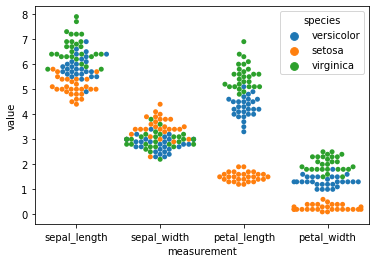

In [55]:
sns.swarmplot(x=train_melt.measurement, y=train_melt.value, hue = 'species', data=train_melt)

3. Create 4 subplots (2 rows x 2 columns) of scatterplots.

- sepal_length x sepal_width

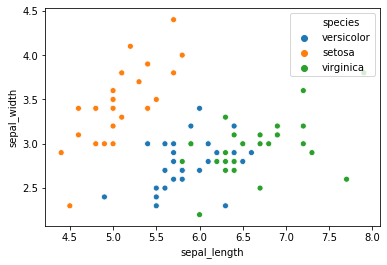

In [56]:
sns.scatterplot(x=train.sepal_length,y=train.sepal_width,hue=train.species)

- petal_length x petal_width

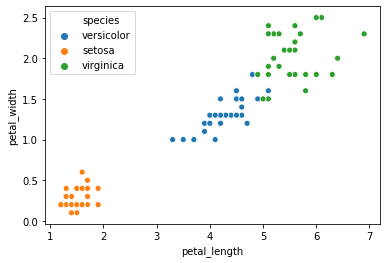

In [57]:
sns.scatterplot(x=train.petal_length,y=train.petal_width,hue=train.species)

- sepal_area x petal_area

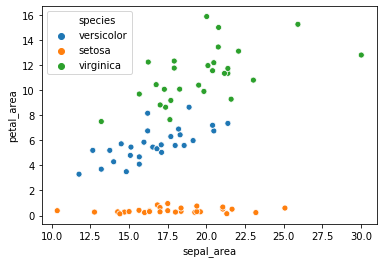

In [58]:
sns.scatterplot(x=train.sepal_area,y=train.petal_area,hue=train.species)

- sepal_length x petal_length

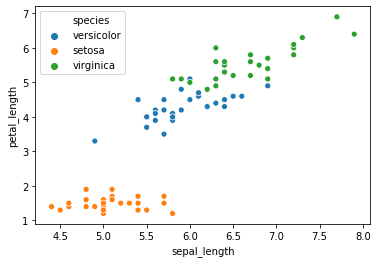

In [59]:
sns.scatterplot(x=train.sepal_length,y=train.petal_length,hue=train.species)

### Subplot

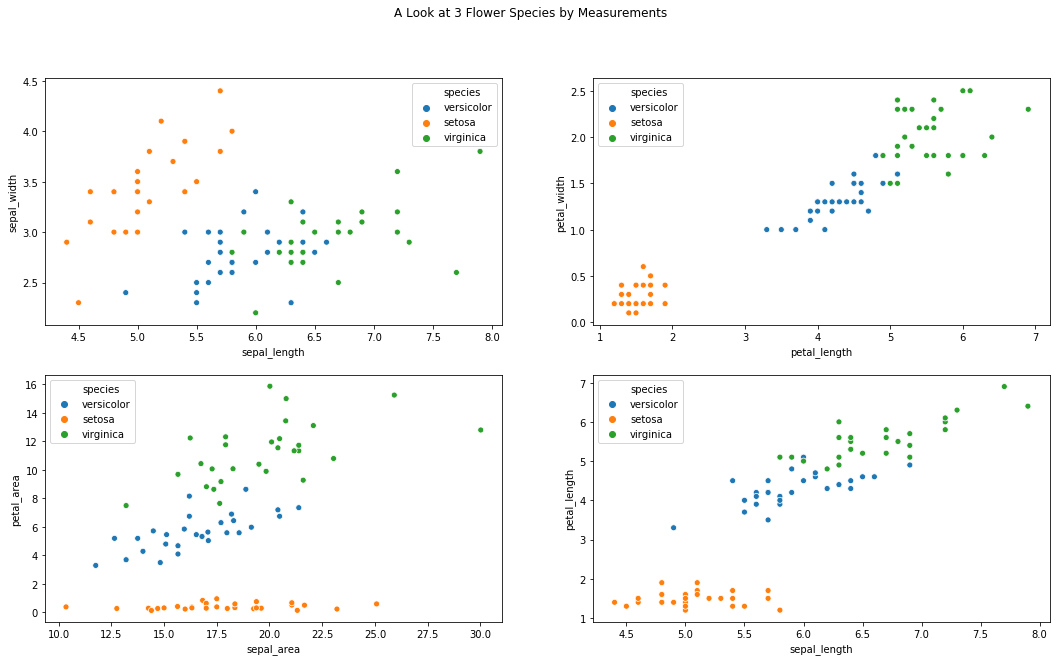

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('A Look at 3 Flower Species by Measurements')

# sepal length vs width
sns.scatterplot(ax=axes[0, 0], data=train, x=train.sepal_length,y=train.sepal_width,hue=train.species)

# petal length vs width
sns.scatterplot(ax=axes[0, 1], data=train, x=train.petal_length,y=train.petal_width,hue=train.species)

# sepal area vs petal area
sns.scatterplot(ax=axes[1, 0], data=train, x=train.sepal_area,y=train.petal_area,hue=train.species)

# sepal vs petal length
sns.scatterplot(ax=axes[1, 1], data=train, x=train.sepal_length,y=train.petal_length,hue=train.species)

What are your takeaways?
- setosa is more distinct than the other two flower species
- petal length vs width has the biggest disctinction for setosa
- while there are points where versicolor and virginica are close together, you can still make generalizations for each
- sepal length
    - smallest ~ setosa
    - middle ~ versicolor
    - largest ~ virginica
- sepal width
    - greatest range ~ setosa
    - smaller and similar range ~ virginica and versicolor
- petal length
    - smallest ~ setosa
    - middle ~ versicolor
    - largest ~ virginica
- petal width
    - smallest ~ setosa
    - middle ~ versicolor
    - largest ~ virginica
- petal area
    - smallest ~ setosa
    - middle ~ versicolor
    - largest ~ virginica
- sepal area
    - similar areas

4. Create a heatmap of each variable layering correlation coefficient on top.

In [61]:
corr = train.corr()
round(corr,2)

,sepal_length,sepal_width,petal_length,petal_width,petal_area,sepal_area
sepal_length,1.00,-0.15,0.87,0.82,0.86,0.62
sepal_width,-0.15,1.00,-0.48,-0.40,-0.34,0.67
petal_length,0.87,-0.48,1.00,0.96,0.95,0.27
petal_width,0.82,-0.40,0.96,1.00,0.98,0.30
petal_area,0.86,-0.34,0.95,0.98,1.00,0.37
sepal_area,0.62,0.67,0.27,0.30,0.37,1.00


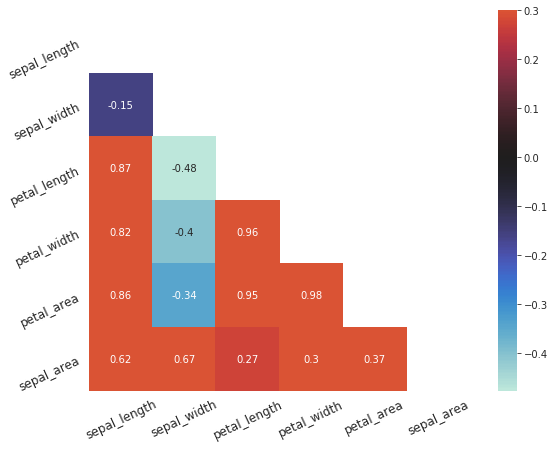

In [78]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(figsize=(10, 7))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, center=0)
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 25, fontsize = 12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 25, fontsize = 12)
    

5. Create a scatter matrix visualizing the interaction of each variable

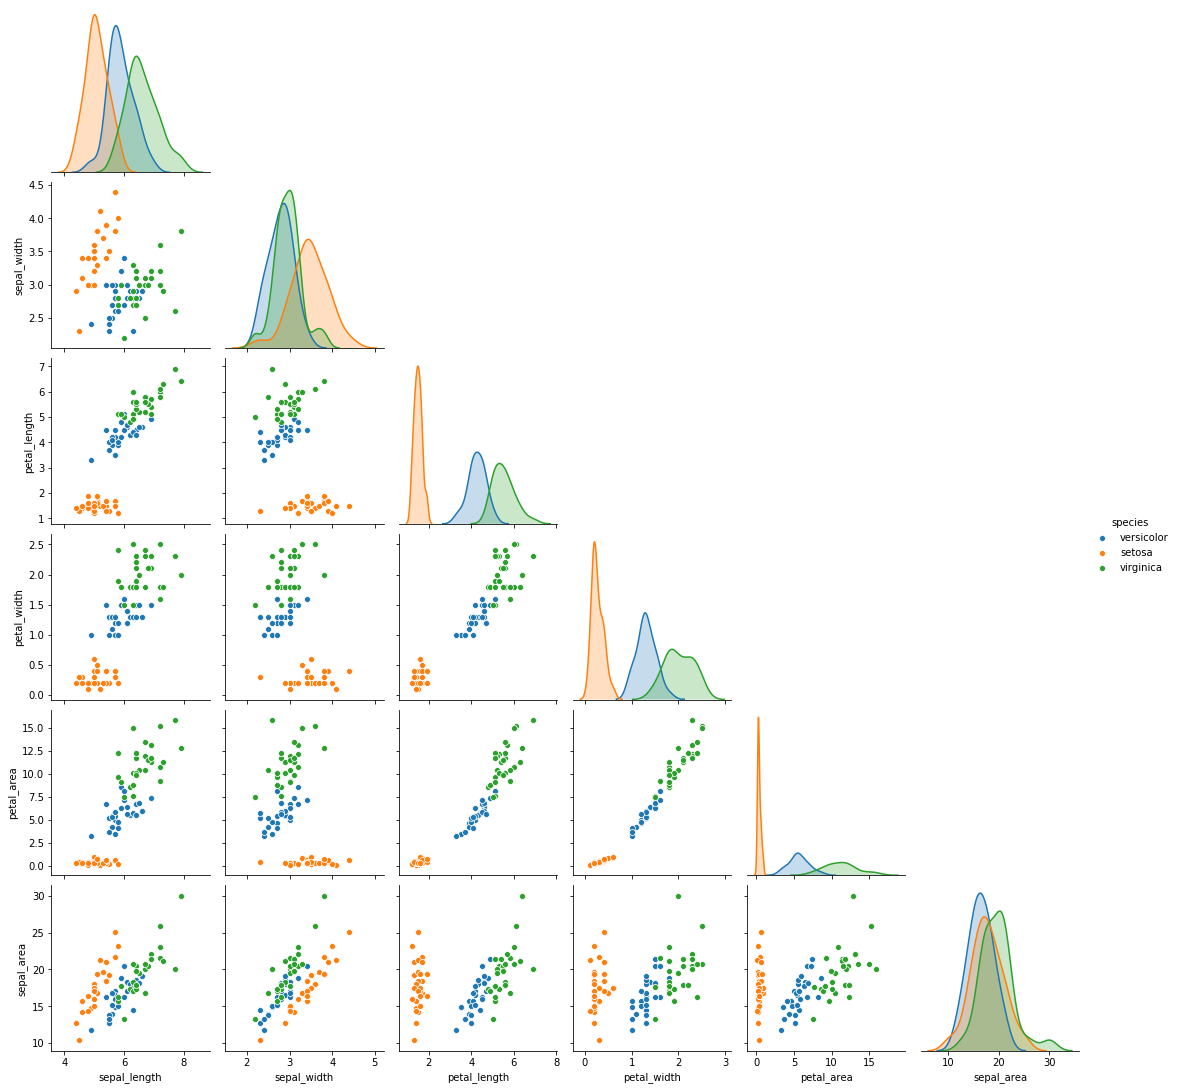

In [63]:
sns.pairplot(train, hue="species",corner=True)

6. Is the sepal length significantly different in virginica compared to versicolor? 

- Run a statistical experiment to test this. Make sure to include a null hypothesis, alternative hypothesis, results, and summary.
    - Null hypothesis: Sepal length in virginica is not significantly different from versicolor
    - Alternative hypothesis: Sepal length is significantly different compared to versicolor

In [64]:
virginica = train[train.species == 'virginica'].sepal_length
versicolor = train[train.species == 'versicolor'].sepal_length

In [65]:
r, p = pearsonr(virginica, versicolor)
r, p

(0.1295564478755326, 0.5111354634944449)

- What is your takeaway from this statistical testing?

- p is high, so we fail to reject the null hypothesis
- r is low, so the *linear* correlation between the two variables is not very high
- with this we can verify a distinction between the sepal length of the tw0 species

7. Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.

In [66]:
# lets take a look at the distribution of petal length and width for each species
# this seems like the most distinct way to predict species type from the visualizations above

In [67]:
vers = train[train.species == 'versicolor'].petal_length
virg = train[train.species == 'virginica'].petal_length
seto = train[train.species == 'setosa'].petal_length

vers_mean = train[train.species == 'versicolor'].petal_length.mean()
virg_mean = train[train.species == 'virginica'].petal_length.mean()
seto_mean = train[train.species == 'setosa'].petal_length.mean()

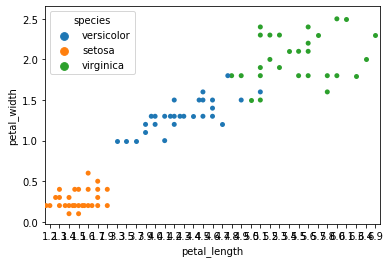

In [68]:
sns.swarmplot(x=train.petal_length,y=train.petal_width,hue=train.species)

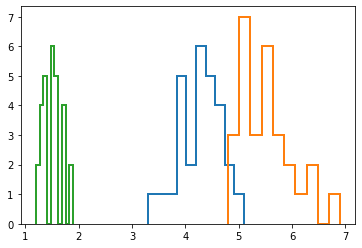

In [69]:
plt.hist(vers,histtype='step',linewidth=2)
plt.hist(virg,histtype='step',linewidth=2)
plt.hist(seto,histtype='step',linewidth=2)
plt.show()

In [80]:
# lets do a hypothesis test, first against versicolor and virginica
# null hypothesis: there is no siginifant difference between versicolor and virginica sepal length
# alternative hypothesis: versicolor sepal length is significantly different than virginica

#species is categorical, sepal is continuos, we use a t-test
#copmaring two different subgroups, so we use a 2 sample t-test
vers = train[train.species == 'versicolor']
virg = train[train.species == 'virginica']

In [81]:
print(vers.sepal_length.var())

0.18109788359788362


In [82]:
print(virg.sepal_length.var())

0.283425925925926


In [90]:
alpha = .05

t, p = ttest_ind(virg.sepal_length, vers.sepal_length)
print('t=',t,'p=',p)

if p < alpha:
    print("Reject null hypothesis.")
elif p > alpha:
    print("Fail to reject null hypothesis.")

t= 5.656491804882077 p= 6.024259917536193e-07
Reject null hypothesis.
